In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.append('../src')
from satellite_image import SatelliteImage
from utils import *
from plot_utils import *
from image_utils import *

In [5]:
import s3fs
import re

In [6]:
update_storage_access()

In [7]:
environment = get_environment()

root_path = get_root_path()

bucket = environment["bucket"]

#2022
#guyane 2022
path_s3_pleiades_data_2022_guyane = environment["sources"]["PLEIADES"][2022]["guyane"]
path_local_pleiades_data_2022_guyane = environment["local-path"]["PLEIADES"][2022]["guyane"]

#martinique 2022
path_s3_pleiades_data_2022_martinique = environment["sources"]["PLEIADES"][2022]["martinique"]
path_local_pleiades_data_2022_martinique = environment["local-path"]["PLEIADES"][2022]["martinique"]
          
#guadeloupe 2022
path_s3_pleiades_data_2022_guadeloupe = environment["sources"]["PLEIADES"][2022]["guadeloupe"]
path_local_pleiades_data_2022_guadeloupe = environment["local-path"]["PLEIADES"][2022]["guadeloupe"]

#mayotte 2022
path_s3_pleiades_data_2022_mayotte = environment["sources"]["PLEIADES"][2022]["mayotte"]
path_local_pleiades_data_2022_mayotte = environment["local-path"]["PLEIADES"][2022]["mayotte"]

#2020
#mayotte 2020
path_s3_pleiades_data_2020_mayotte = environment["sources"]["PLEIADES"][2020]["mayotte"]
path_local_pleiades_data_2020_mayotte = environment["local-path"]["PLEIADES"][2020]["mayotte"]

#2019
#mayotte 2019
path_s3_pleiades_data_2019_mayotte = environment["sources"]["PLEIADES"][2019]["mayotte"]
path_local_pleiades_data_2019_mayotte = environment["local-path"]["PLEIADES"][2019]["mayotte"]

#2018
#reunion 2018
path_s3_pleiades_data_2018_reunion = environment["sources"]["PLEIADES"][2018]["reunion"]
path_local_pleiades_data_2018_reunion = environment["local-path"]["PLEIADES"][2018]["reunion"]

#2017
#martinique 2017
path_s3_pleiades_data_2017_martinique = environment["sources"]["PLEIADES"][2017]["martinique"]
path_local_pleiades_data_2017_martinique = environment["local-path"]["PLEIADES"][2017]["martinique"]

#mayotte 2017
path_s3_pleiades_data_2017_mayotte = environment["sources"]["PLEIADES"][2017]["mayotte"]
path_local_pleiades_data_2017_mayotte = environment["local-path"]["PLEIADES"][2017]["mayotte"]

fs = s3fs.S3FileSystem(client_kwargs={"endpoint_url": "https://minio.lab.sspcloud.fr"})

In [15]:
# DL PLEIADE guyane 2022 utilisé !
fs.download(
        rpath=f"{bucket}/{path_s3_pleiades_data_2022_guyane}",
        lpath=f"../{path_local_pleiades_data_2022_guyane}",
        recursive=True)

In [16]:
# DL PLEIADE martinique 2022 utilisé !
fs.download(
        rpath=f"{bucket}/{path_s3_pleiades_data_2022_martinique}",
        lpath=f"../{path_local_pleiades_data_2022_martinique}",
        recursive=True)

In [17]:
# DL PLEIADE martinique 2017 utilisé !
fs.download(
        rpath=f"{bucket}/{path_s3_pleiades_data_2017_martinique}",
        lpath=f"../{path_local_pleiades_data_2017_martinique}",
        recursive=True)

In [8]:
# DL PLEIADE mayotte 2020
fs.download(
        rpath=f"{bucket}/{path_s3_pleiades_data_2020_mayotte}",
        lpath=f"../{path_local_pleiades_data_2020_mayotte}",
        recursive=True)

In [ ]:
# DL PLEIADE mayotte 2017
fs.download(
        rpath=f"{bucket}/{path_s3_pleiades_data_2017_mayotte}",
        lpath=f"../{path_local_pleiades_data_2017_mayotte}",
        recursive=True)

In [28]:
#image choisie
filename = '../data/PLEIADES/2022/GUYANE/ORT_2022072050325085_0353_0545_U22N_16Bits.jp2'
date = datetime.strptime(re.search(r'ORT_(\d{8})', filename).group(1), '%Y%m%d')
date

datetime.datetime(2022, 7, 20, 0, 0)

In [215]:
image = SatelliteImage.from_raster(
        filename,
        date = date, 
        n_bands = 4,
        dep = "973"
    )
image.normalize()

Test masque infrarouge simple

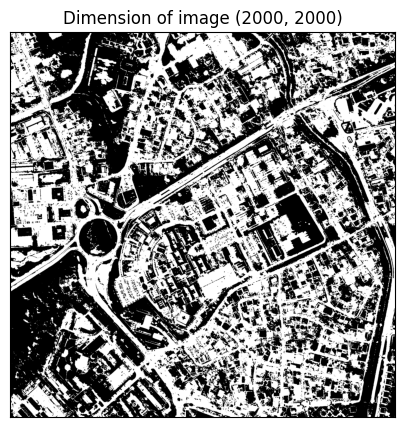

In [30]:
plot_infrared_simple_mask(image)

Test masque infrarouge patch

In [34]:
image = SatelliteImage.from_raster(
        filename,
        date = date, 
        n_bands = 4,
        dep = "973"
    )
image.normalize()

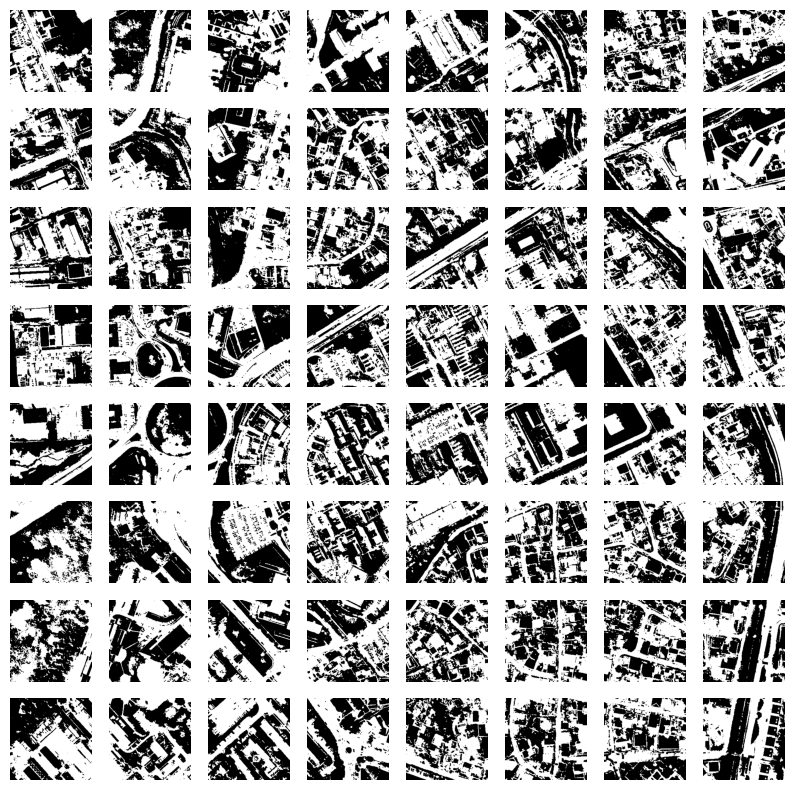

In [35]:
plot_infrared_patch_mask(image)

Test masque infrarouge complexe

In [36]:
image = SatelliteImage.from_raster(
        filename,
        date = date, 
        n_bands = 4,
        dep = "973"
    )
image.normalize()

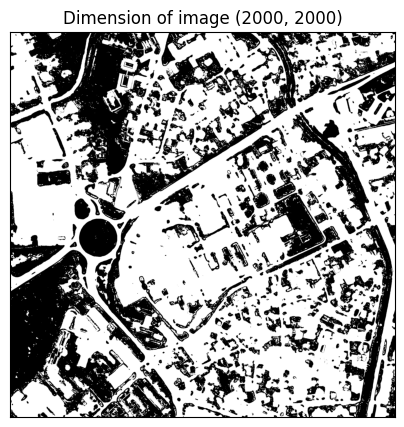

In [37]:
plot_infrared_complex_mask(image)

In [38]:
#image 1
filename_1 = '../data/PLEIADES/2022/MARTINIQUE/ORT_2022_0697_1640_U20N_8Bits.jp2'
date_1 = date.fromisoformat('2022-01-01')

In [39]:
image_1 = SatelliteImage.from_raster(
        filename_1,
        date = date_1, 
        n_bands = 3,
        dep = "972"
    )
image_1.normalize()

Tests crs_to_gps_image

In [55]:
crs_to_gps_image(None, filename_1)

(14.827025734562506, -61.16930531772711)

In [56]:
crs_to_gps_image(image_1)

(14.827025734562506, -61.16930531772711)

Test gps_to_crs_point

In [57]:
gps_to_crs_point(14.636195717948983, -61.04095442371388, '5490') 

(711000.0000002225, 1618999.9999483444)

Tests find_image_of_point

In [66]:
find_image_of_point([713000.0, 1606000.0], '../data/PLEIADES/2022/MARTINIQUE') 

'../data/PLEIADES/2022/MARTINIQUE/ORT_2022_0713_1607_U20N_8Bits.jp2'

In [67]:
find_image_of_point([14.635338, -61.038345], '../data/PLEIADES/2022/MARTINIQUE', coord_gps = True)

'../data/PLEIADES/2022/MARTINIQUE/ORT_2022_0711_1619_U20N_8Bits.jp2'

In [70]:
find_image_different_years(2017, None, filename_1)

'../data/PLEIADES/2017/MARTINIQUE/972-2017-0697-1640-U20N-0M50-RVB-E100.jp2'

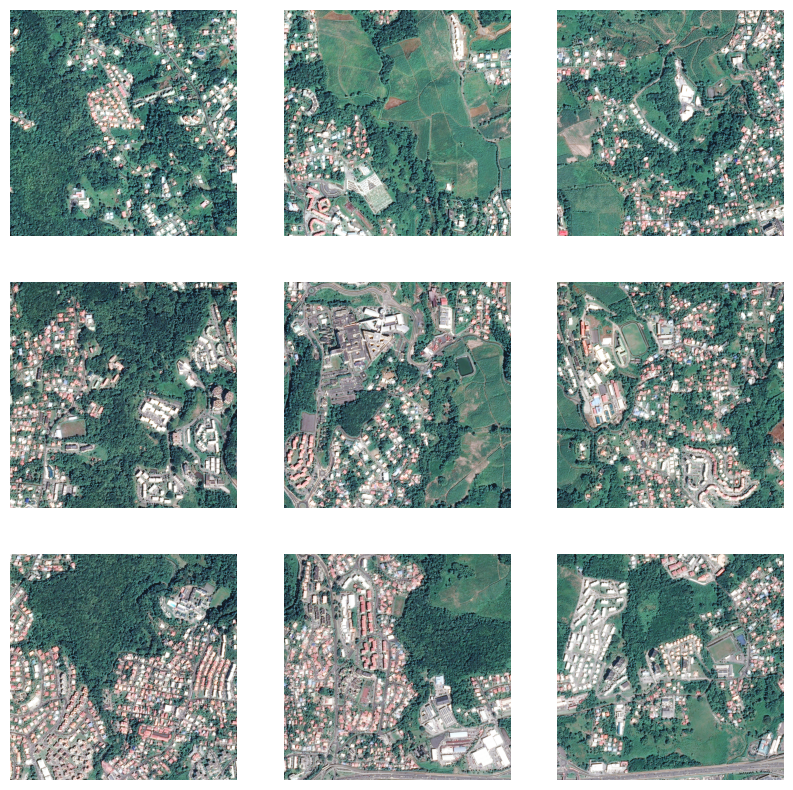

In [77]:
plot_square_images([0,1,2], 1 , None ,'../data/PLEIADES/2017/MARTINIQUE/72-2017-0711-1619-U20N-0M50-RVB-E100.jp2')